[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요. 

# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [2]:
# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")
    
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [ ]:
# %ls data

In [3]:
from glob import glob

# glob("data/*.csv")

In [6]:
# df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv", 
#                      encoding="cp949")
df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale.csv.zip", 
                     encoding="cp949")
df_raw.shape

(450, 27)

In [7]:
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,828752,893026,917330,964762,1244311,1338103,1517805,1860640
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,766783,1070693,1157158,1336372,1645003
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,163139,167707,155494,197979,173618,180945,181433,215637
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,2042,1485,1554,1791,1656,1530,1438,1571
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,0,2,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,567,634,665,469,504,589,465,488,308,531
447,기타,기 타,계,765,735,849,804,788,805,724,...,814,1101,1067,1063,1120,770,711,689,469,1094
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,82,266,272,316,404,0,0,1,0,1


In [5]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
EU            45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,41204,39108,36536,47981,39995,43443,53852,51478
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2071,2657,2951,1818,1483
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,36020,35505,34219,45910,37338,40492,52034,49995
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,696,567,773,854,621,646,934,802
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [27]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531
10797,기타,기 타,계,2019 4/4 p),1094
10798,기타,기 타,면세점,2019 4/4 p),1


## 데이터 전처리
### 기간에서 연도를 분리하기

In [38]:
df["연도"] = df["기간"].map(lambda x: int(x.split()[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
5,합계,컴퓨터 및 주변기기,면세점 이외,2014 1/4,-,2014
6,합계,가전·전자·통신기기,계,2014 1/4,13259,2014
7,합계,가전·전자·통신기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531,2019
10797,기타,기 타,계,2019 4/4 p),1094,2019
10798,기타,기 타,면세점,2019 4/4 p),1,2019


In [82]:
"2019 3/4 p".split()[1].split()[0]

'3/4'

In [39]:
df["분기"] = df["기간"].apply(lambda  x : int(x.split()[1].split("/")[0]))
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1
5,합계,컴퓨터 및 주변기기,면세점 이외,2014 1/4,-,2014,1
6,합계,가전·전자·통신기기,계,2014 1/4,13259,2014,1
7,합계,가전·전자·통신기기,면세점,2014 1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [40]:
df["million"] = df["million"].replace("-", np.nan).astype(float)
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
5,합계,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
6,합계,가전·전자·통신기기,계,2014 1/4,13259.0,2014,1
7,합계,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,2019,4
10797,기타,기 타,계,2019 4/4 p),1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4 p),1.0,2019,4


### 필요없는 데이터 제거하기

In [15]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") |
        (df["상품군별"] != "합계") |
        (df["판매유형별"] != "계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10793,기타,농축수산물,면세점 이외,2019 4/4 p),2.0,2019,4
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,2019,4
10798,기타,기 타,면세점,2019 4/4 p),1.0,2019,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048 entries, 49 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  6048 non-null   object 
 1   상품군별     6048 non-null   object 
 2   판매유형별    6048 non-null   object 
 3   기간       6048 non-null   object 
 4   million  3024 non-null   float64
 5   연도       6048 non-null   int64  
 6   분기       6048 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 378.0+ KB


In [20]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

In [22]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1


In [41]:
#계 포함하기
df = df[(df["국가(대륙)별"] != "합계") &
        (df["상품군별"] != "합계")]

In [42]:
df_total = df[df['판매유형별'] =='계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


## K-Beauty 시각화
### 전체 상품군 판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

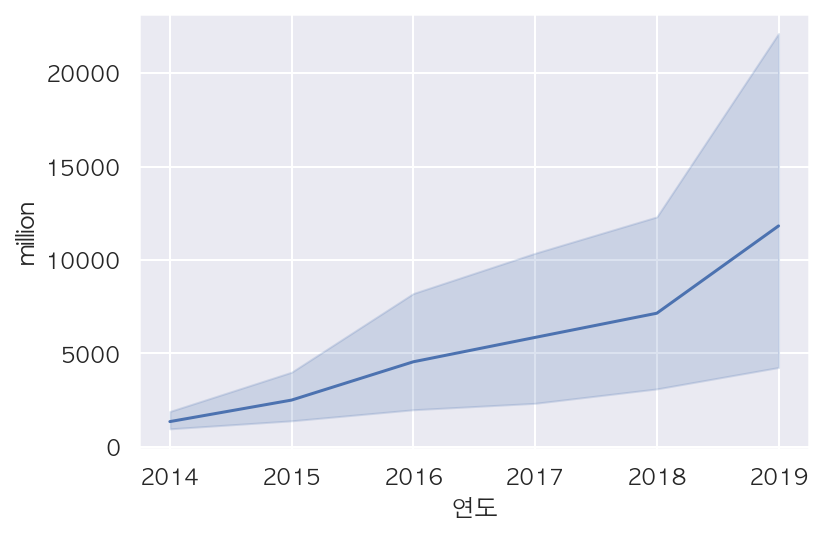

In [43]:
sns.lineplot(data=df_total, x='연도', y='million')

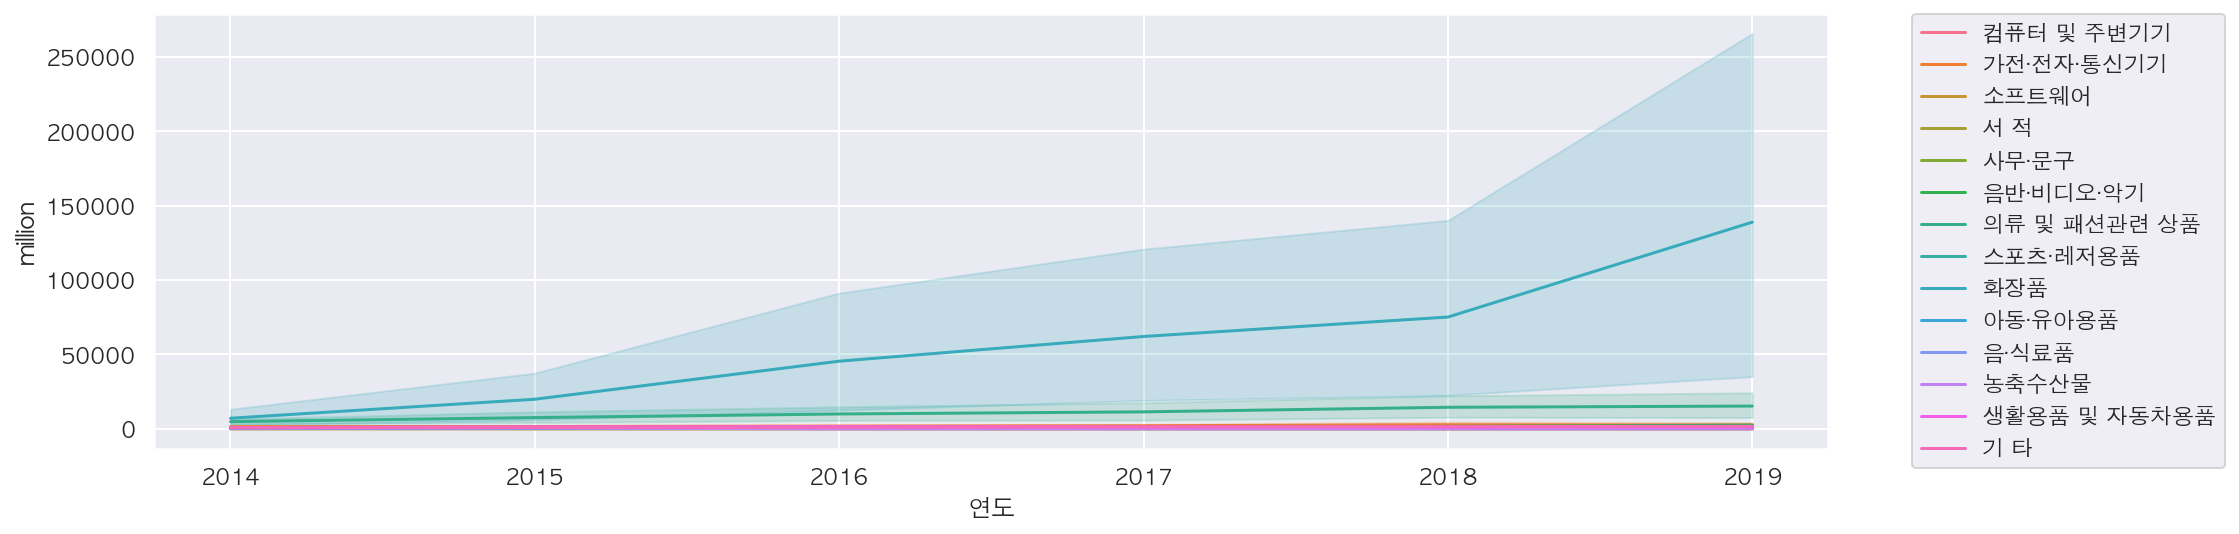

In [44]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_total, hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

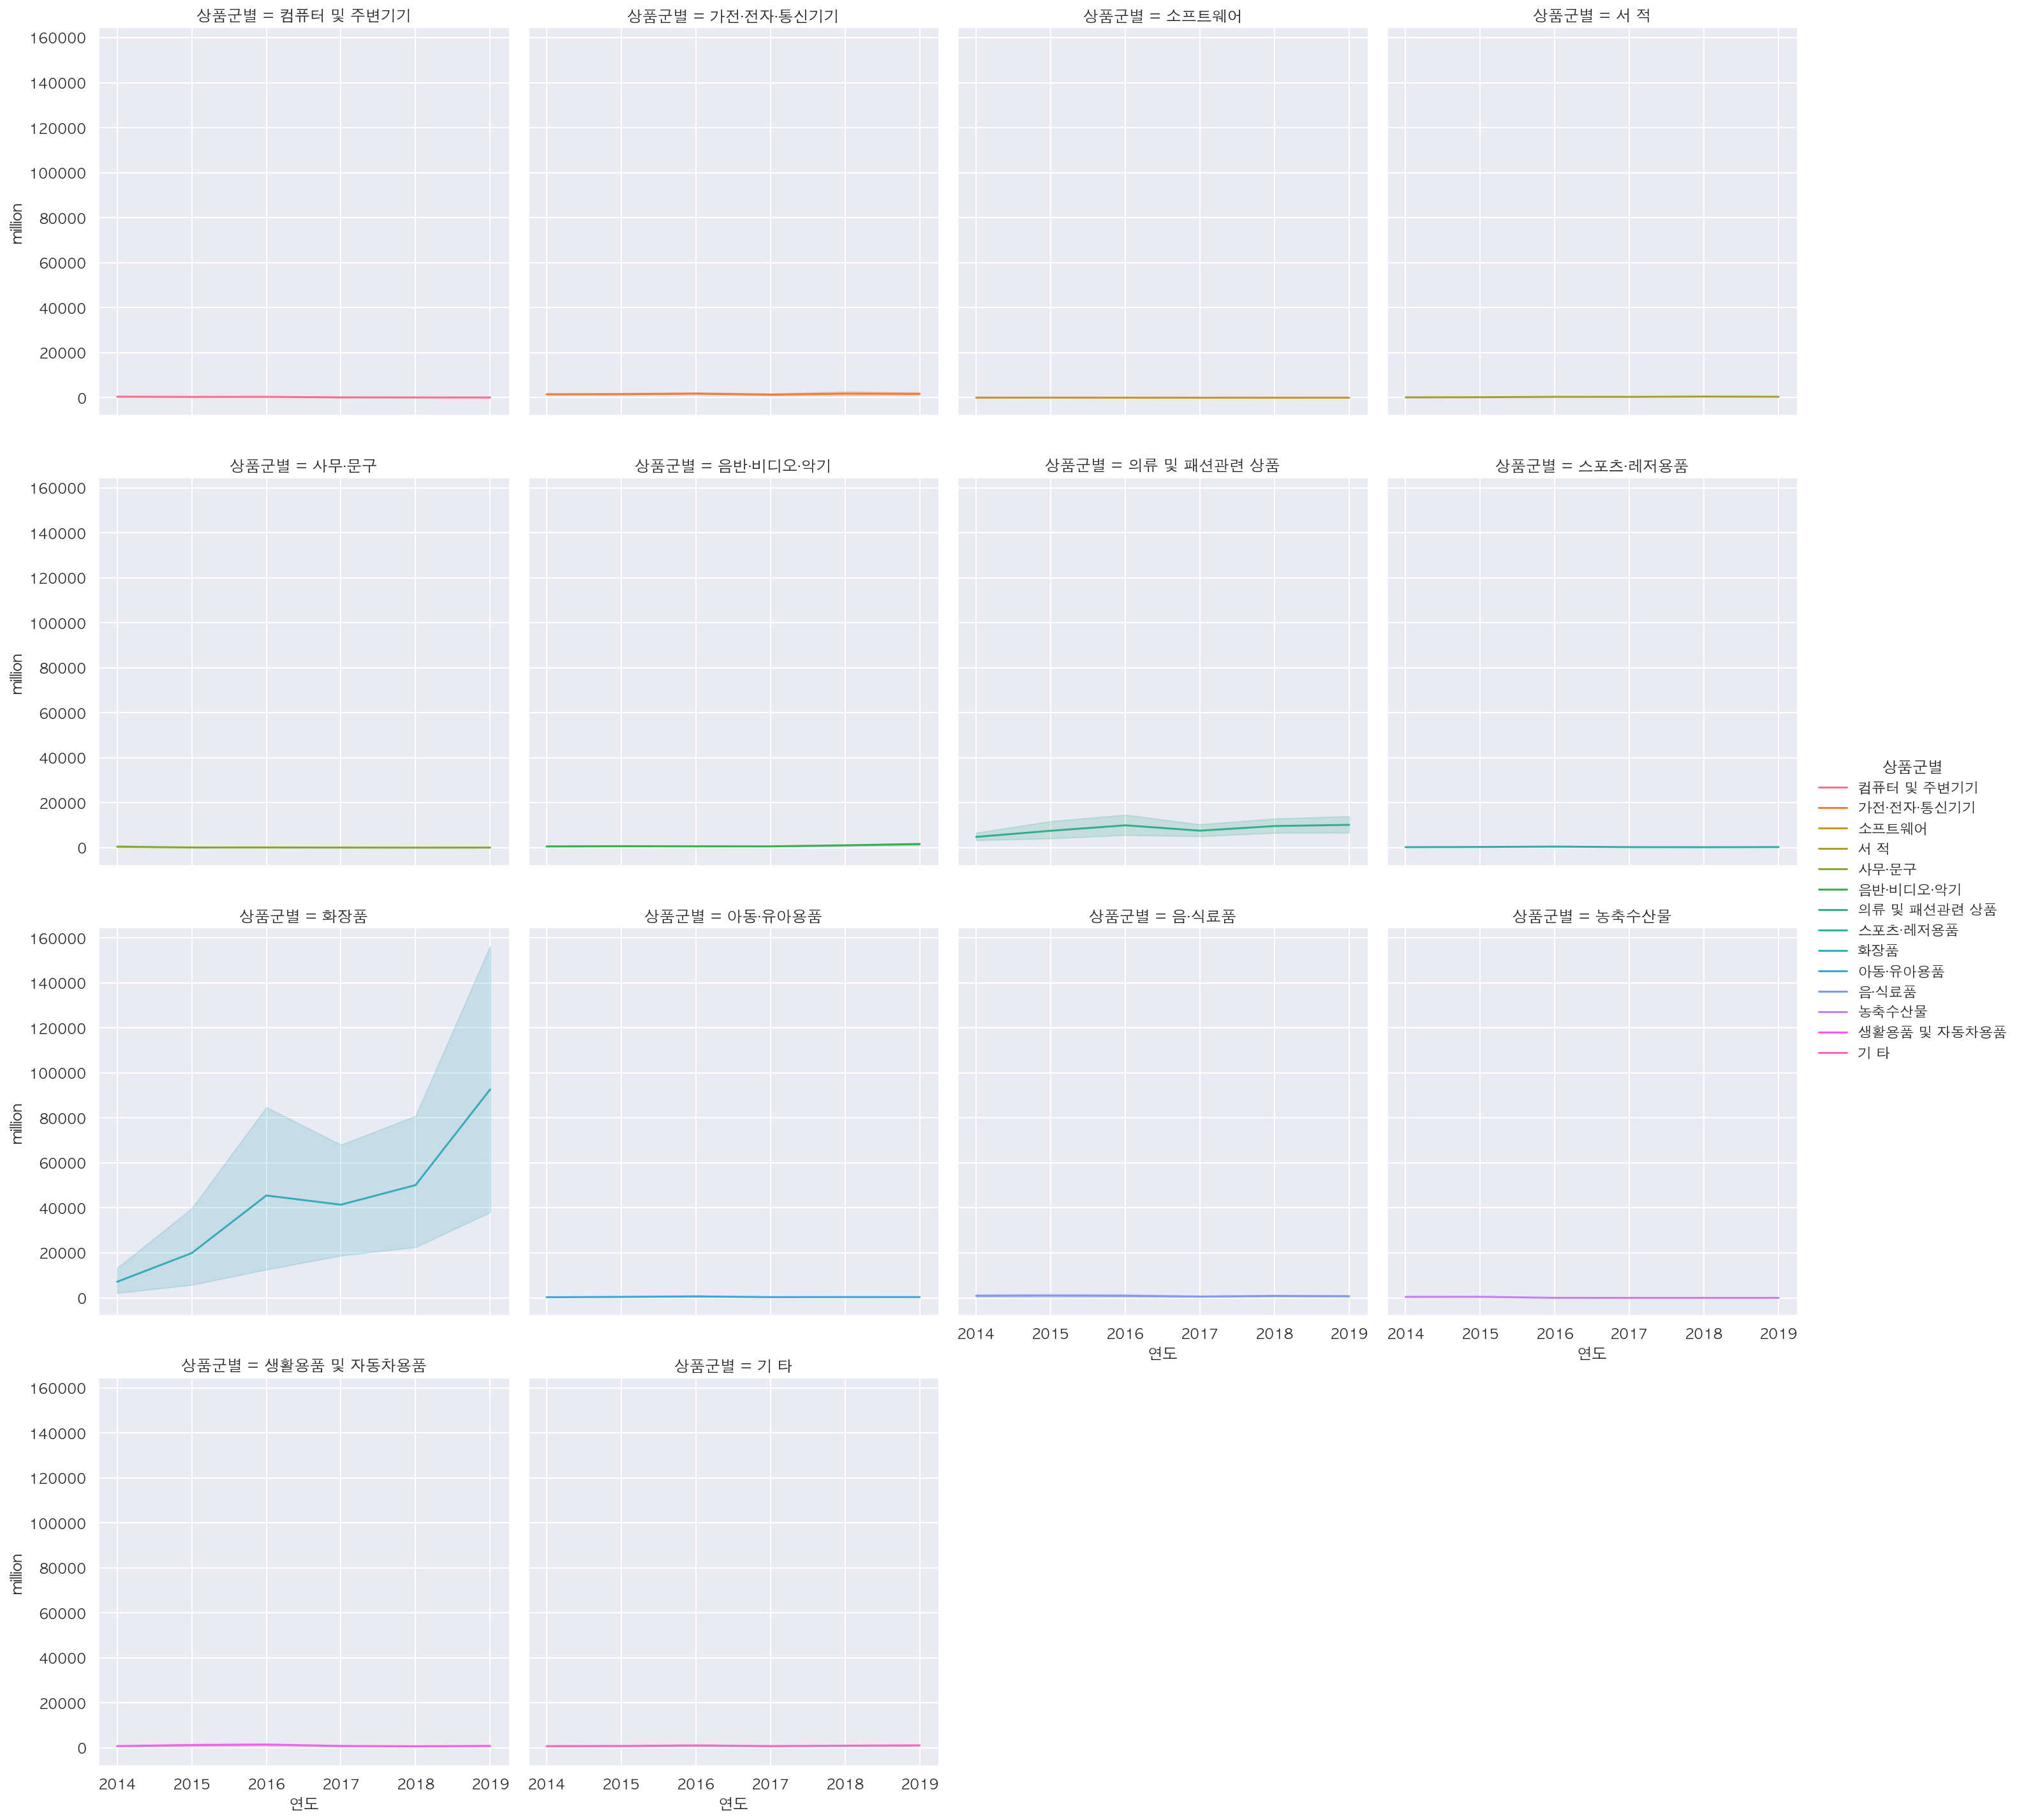

In [46]:
sns.relplot(x="연도", y="million", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [50]:
df_sub =  df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


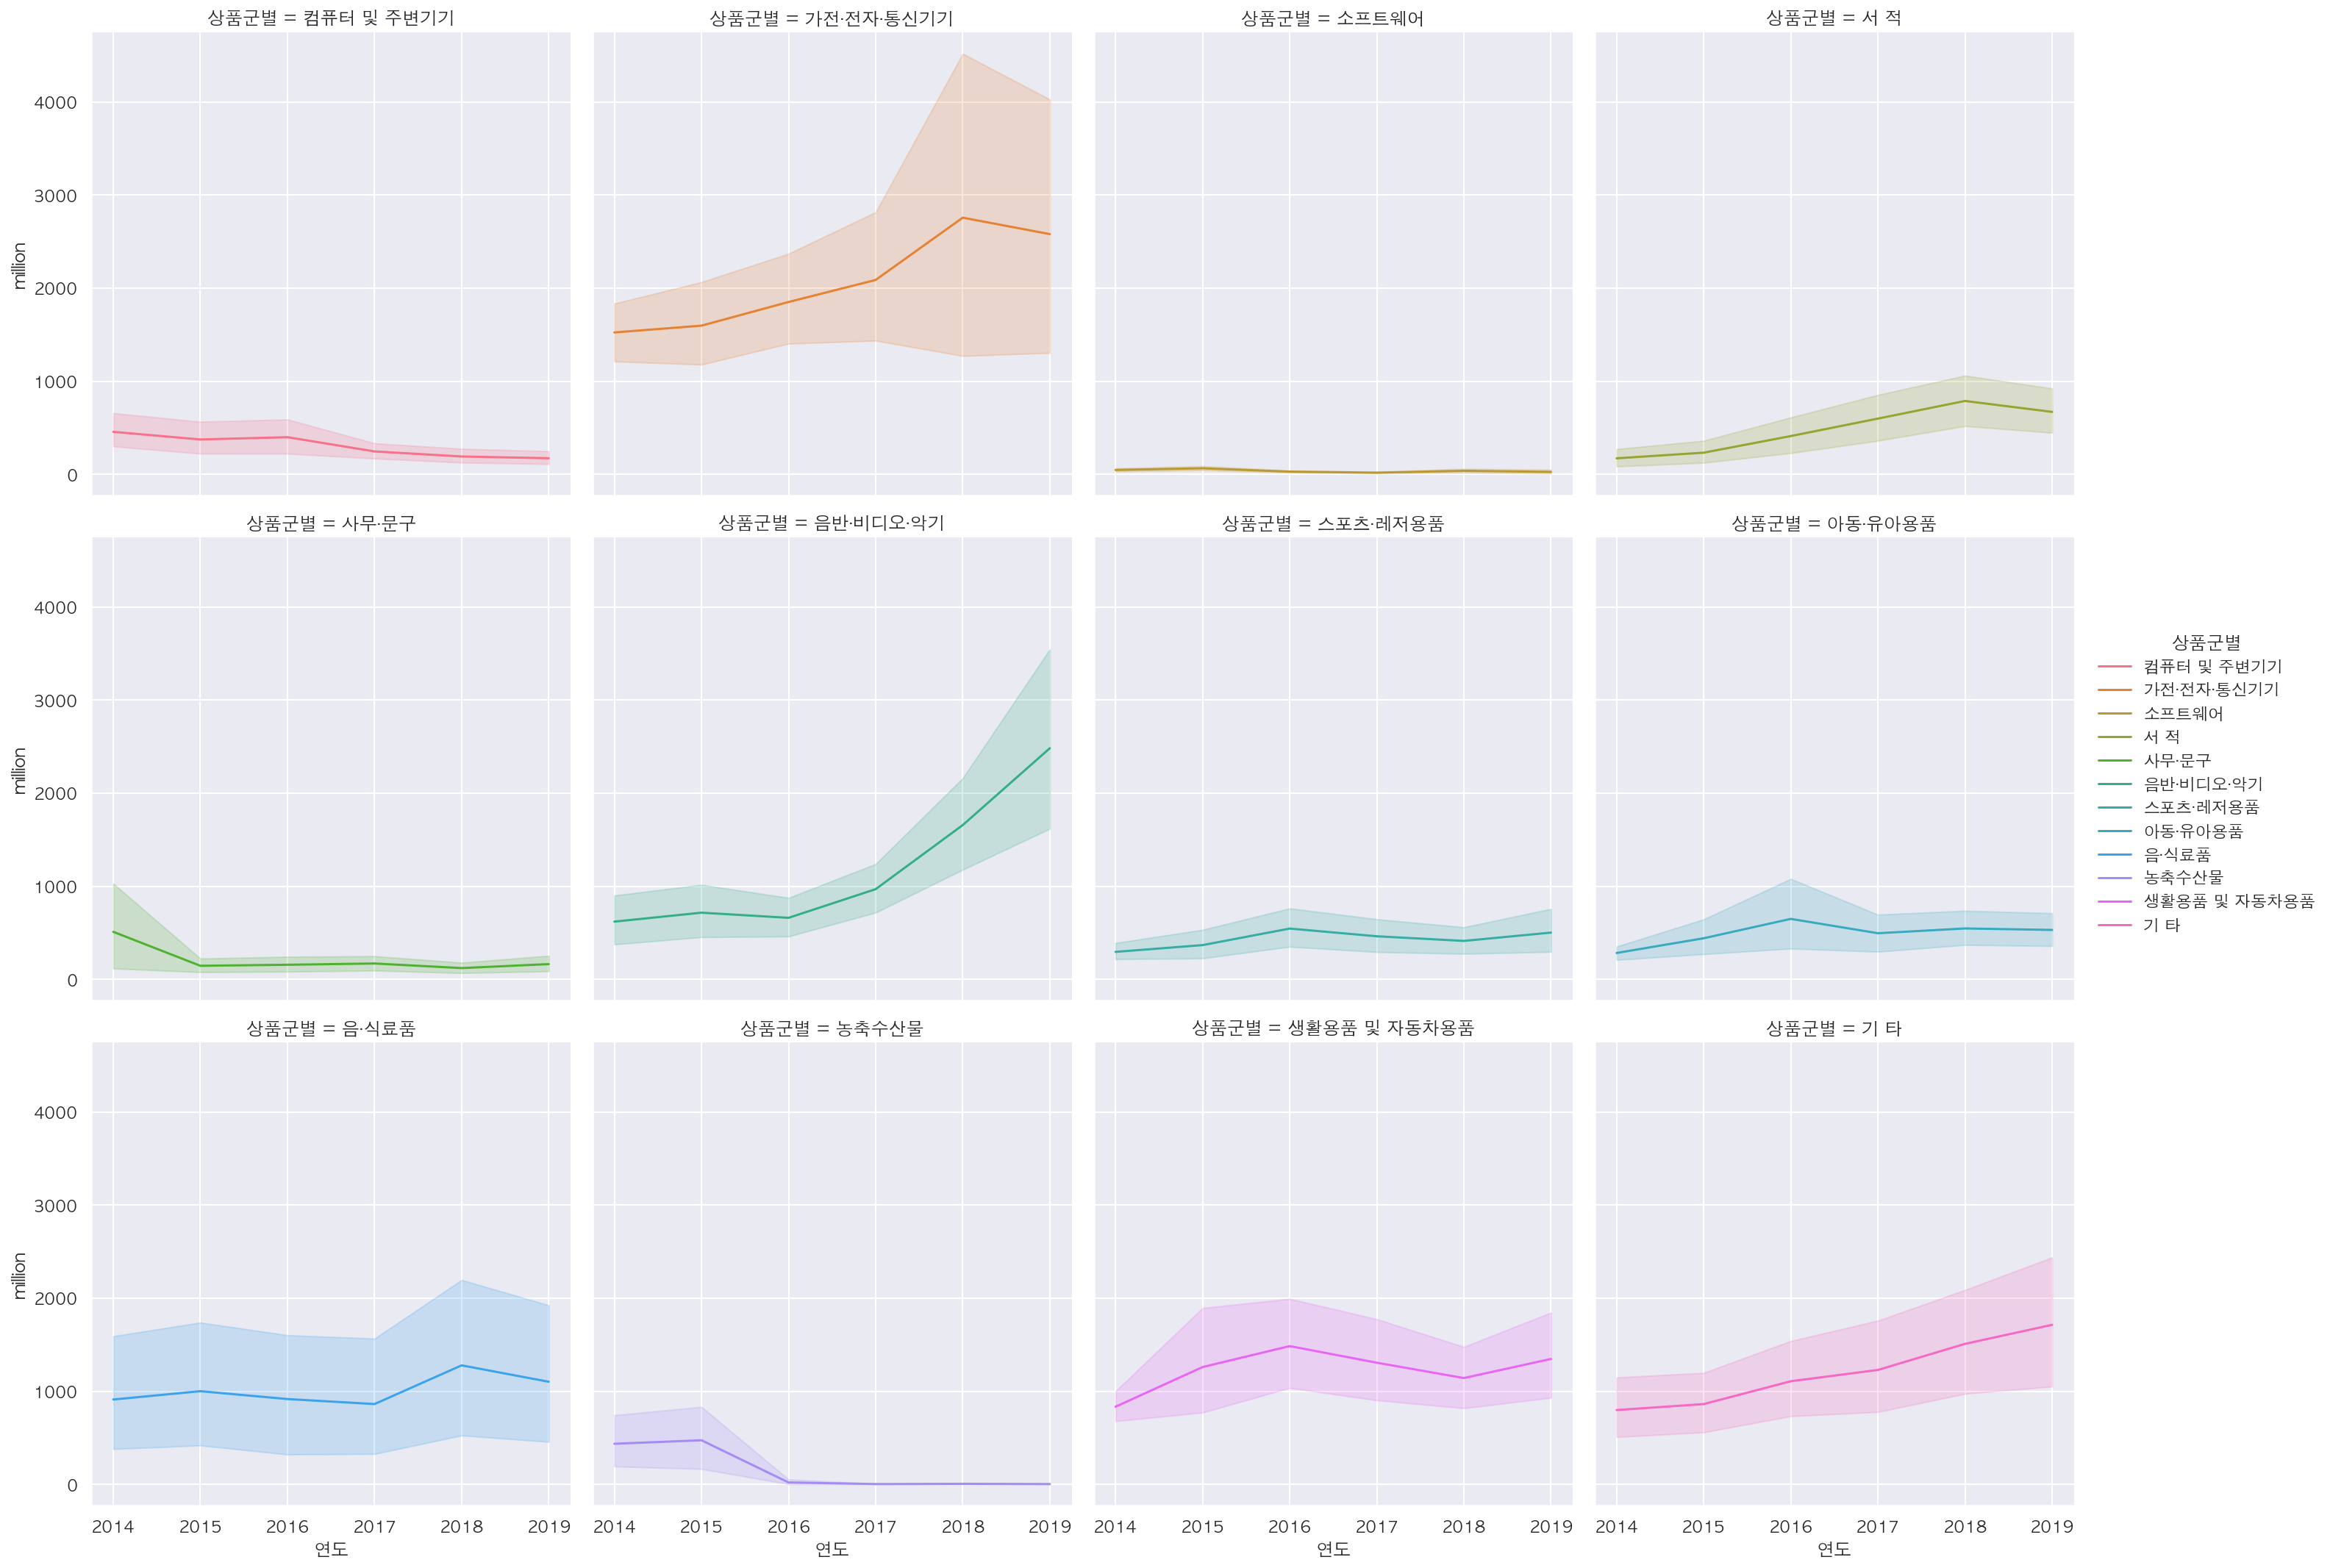

In [51]:
sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

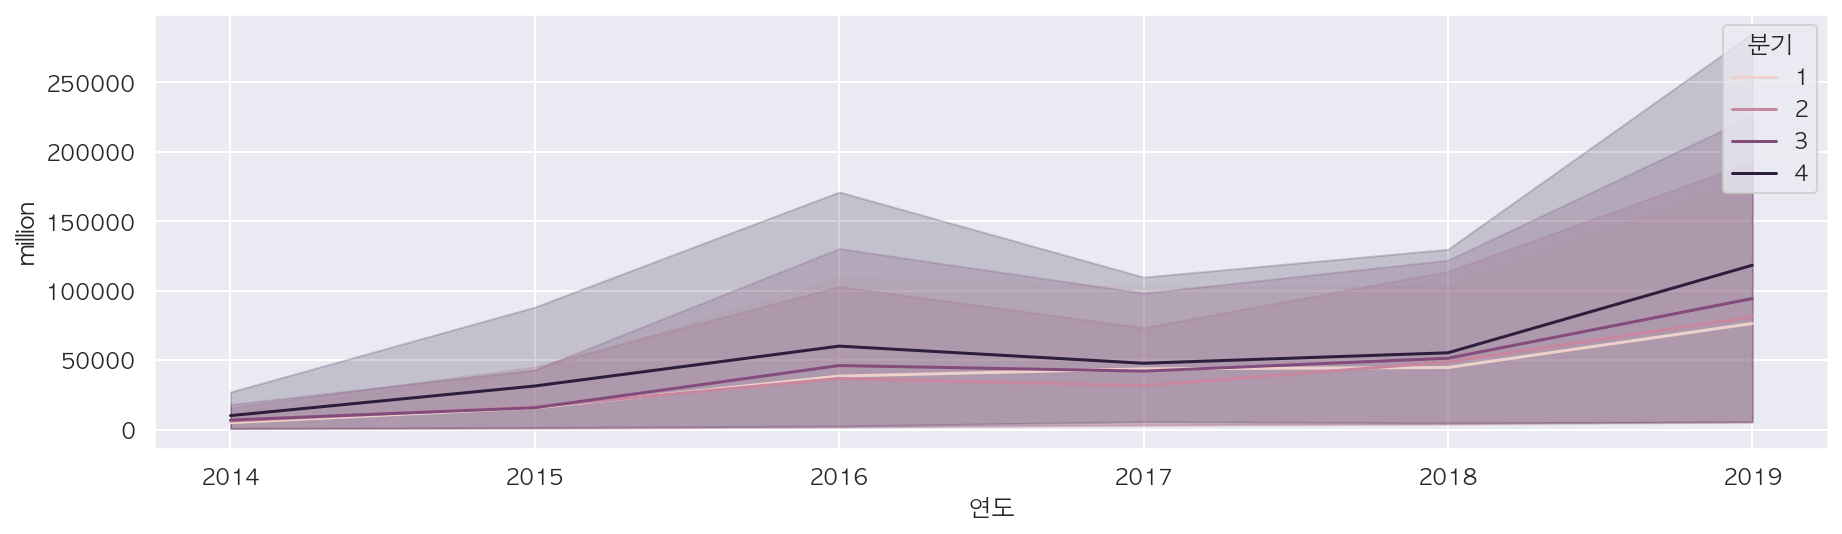

In [52]:
df_cosmetic = df[(df["상품군별"] == "화장품")].copy()
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='million'>

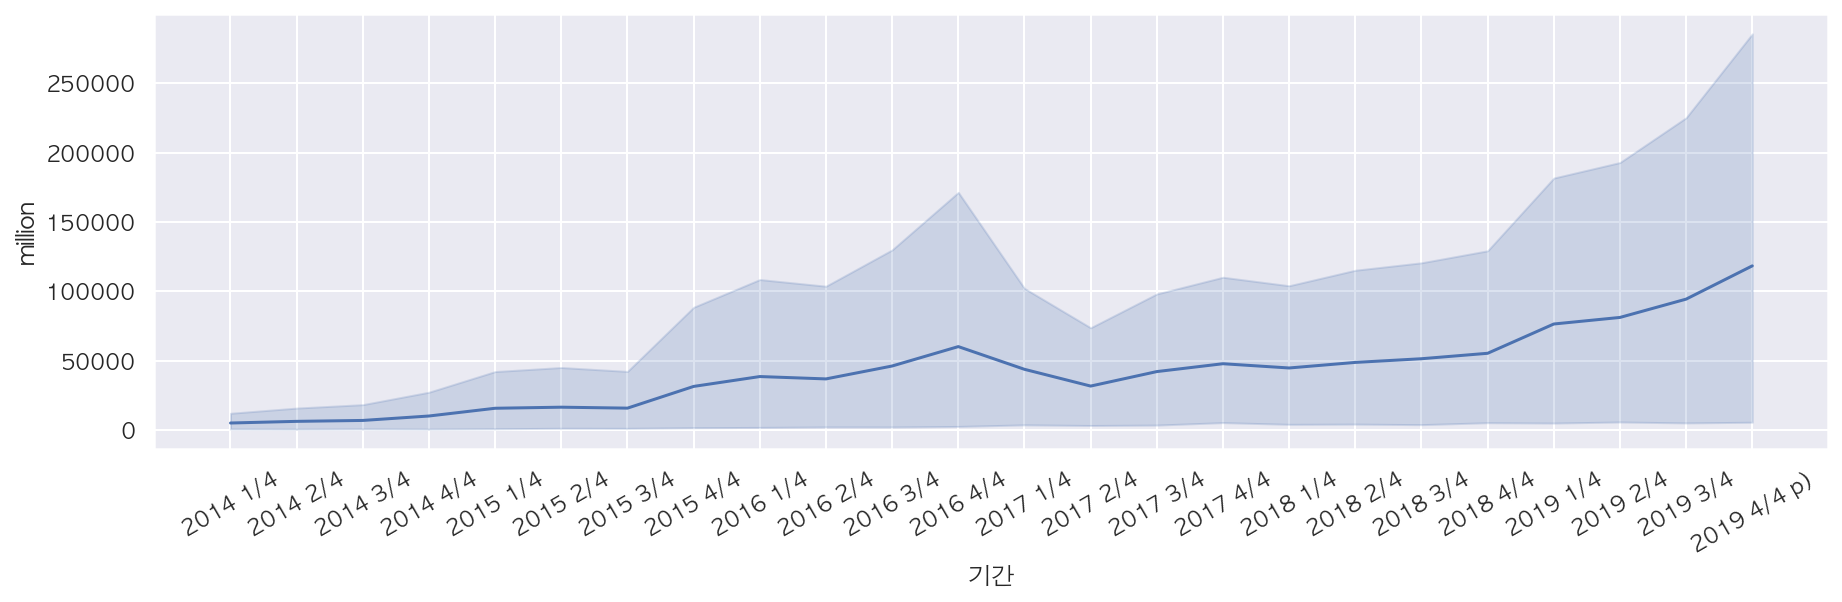

In [53]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

<AxesSubplot:xlabel='기간', ylabel='million'>

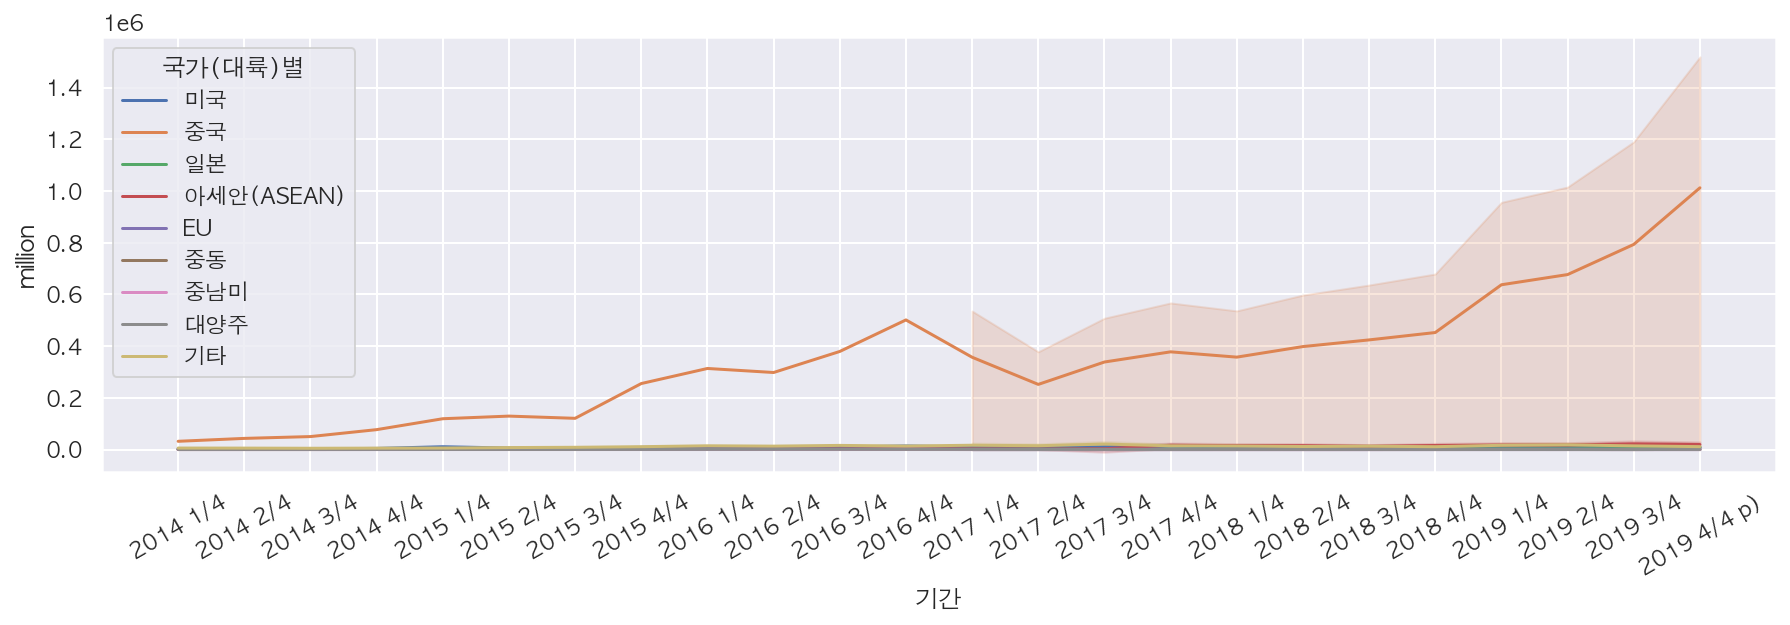

In [54]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


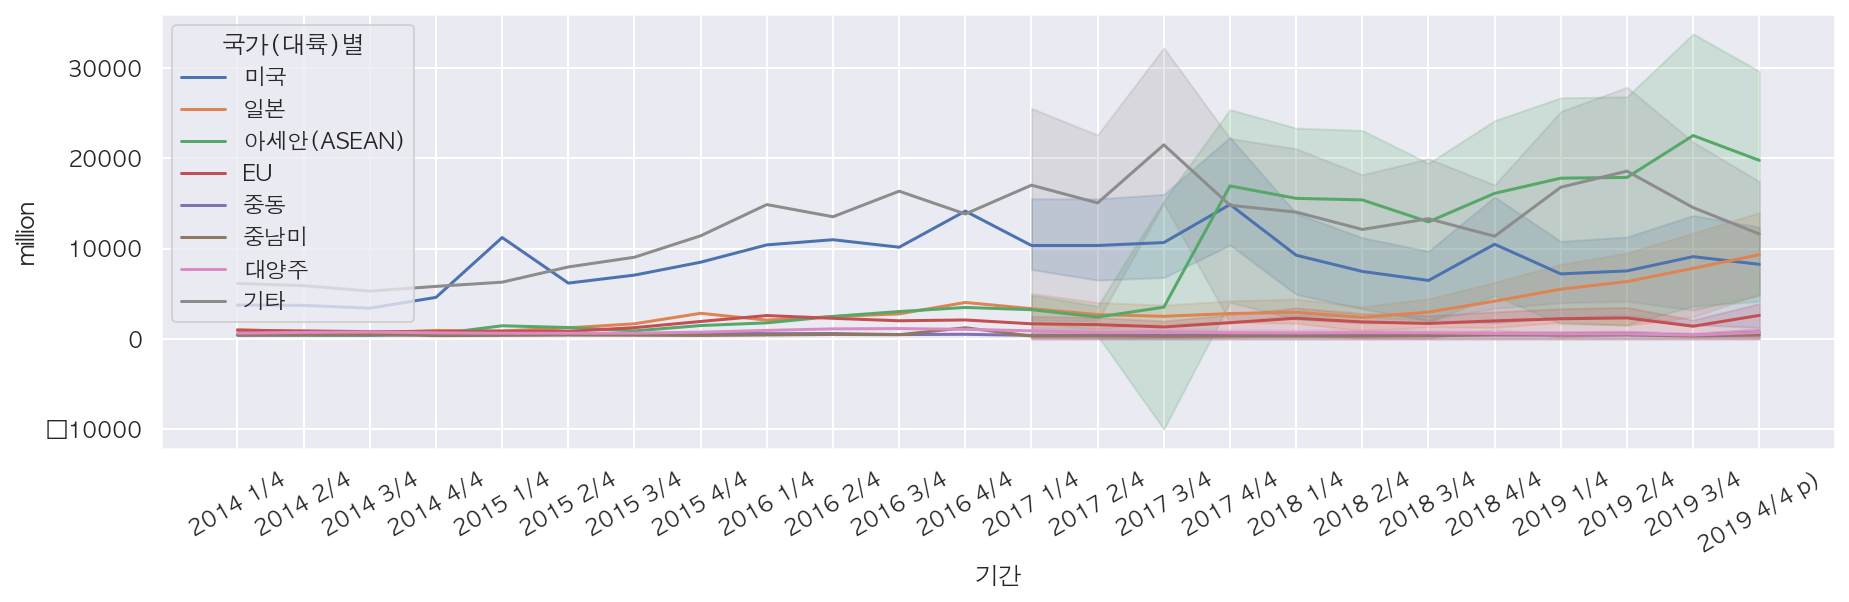

In [55]:
#중국 제외한 그래프
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'], 
             x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

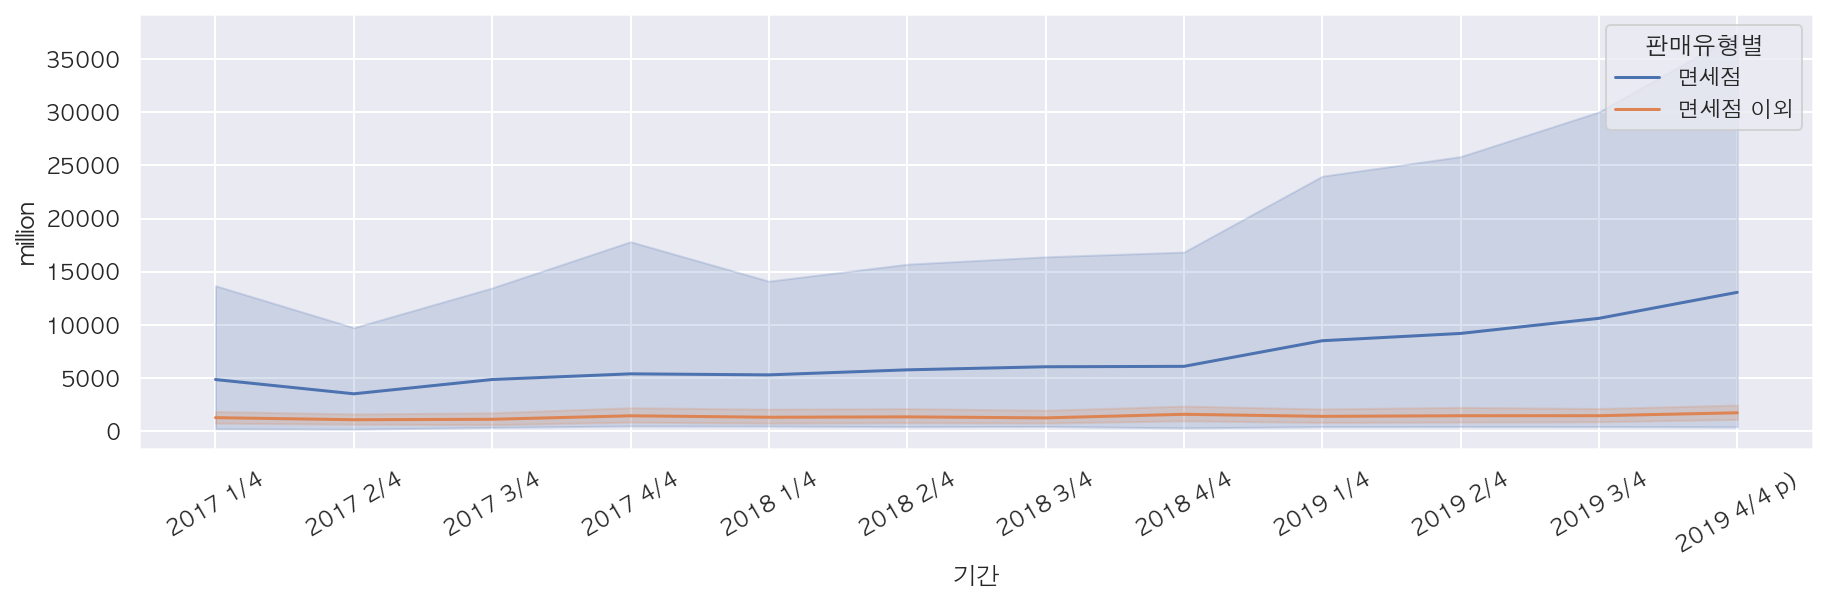

In [59]:

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[df['판매유형별'] != '계'].copy()
sns.lineplot(data=df_sub, x='기간', y='million', hue='판매유형별')



<AxesSubplot:xlabel='기간', ylabel='million'>

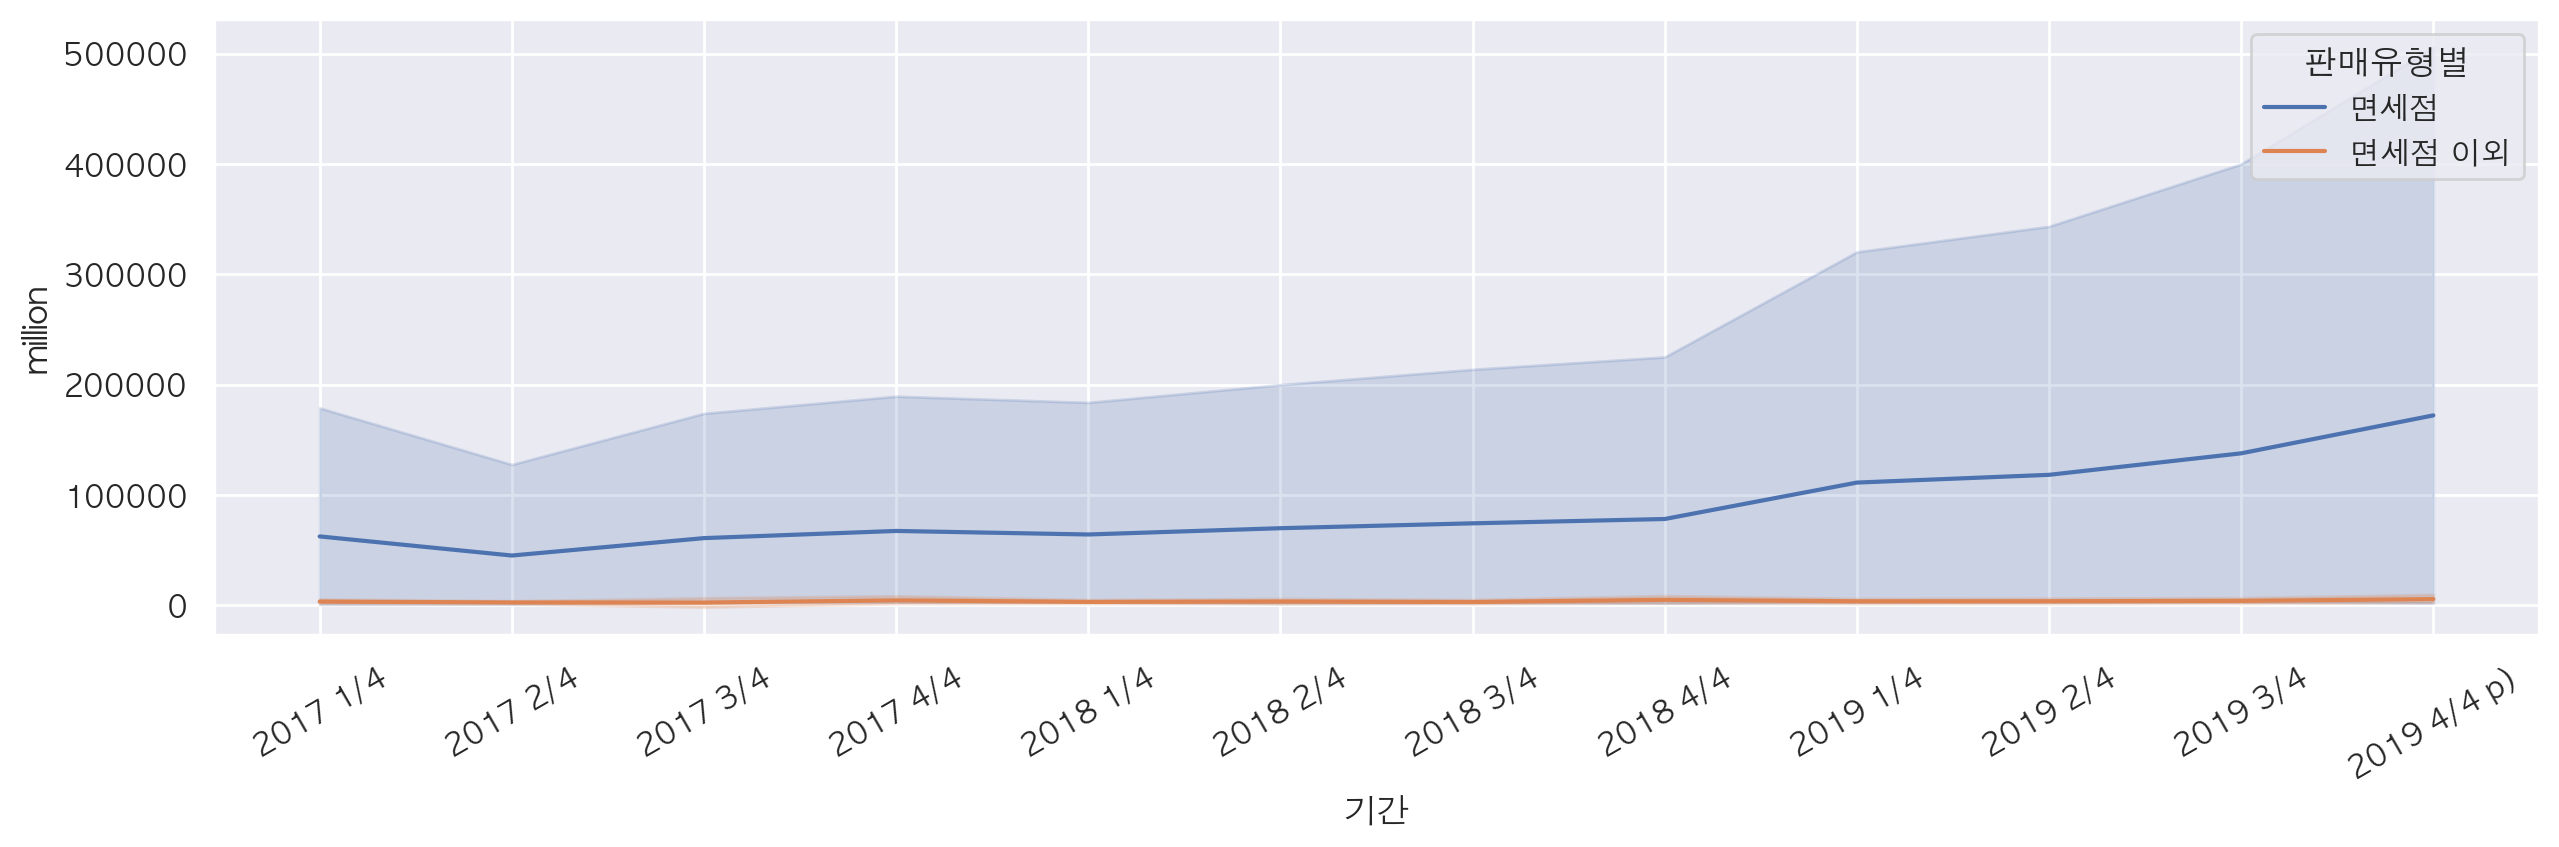

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="판매유형별")

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [61]:
df_fashion = df[(df["상품군별"] == '의류 및 패션관련 상품') & (df['판매유형별']=='계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


<AxesSubplot:title={'center':'의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

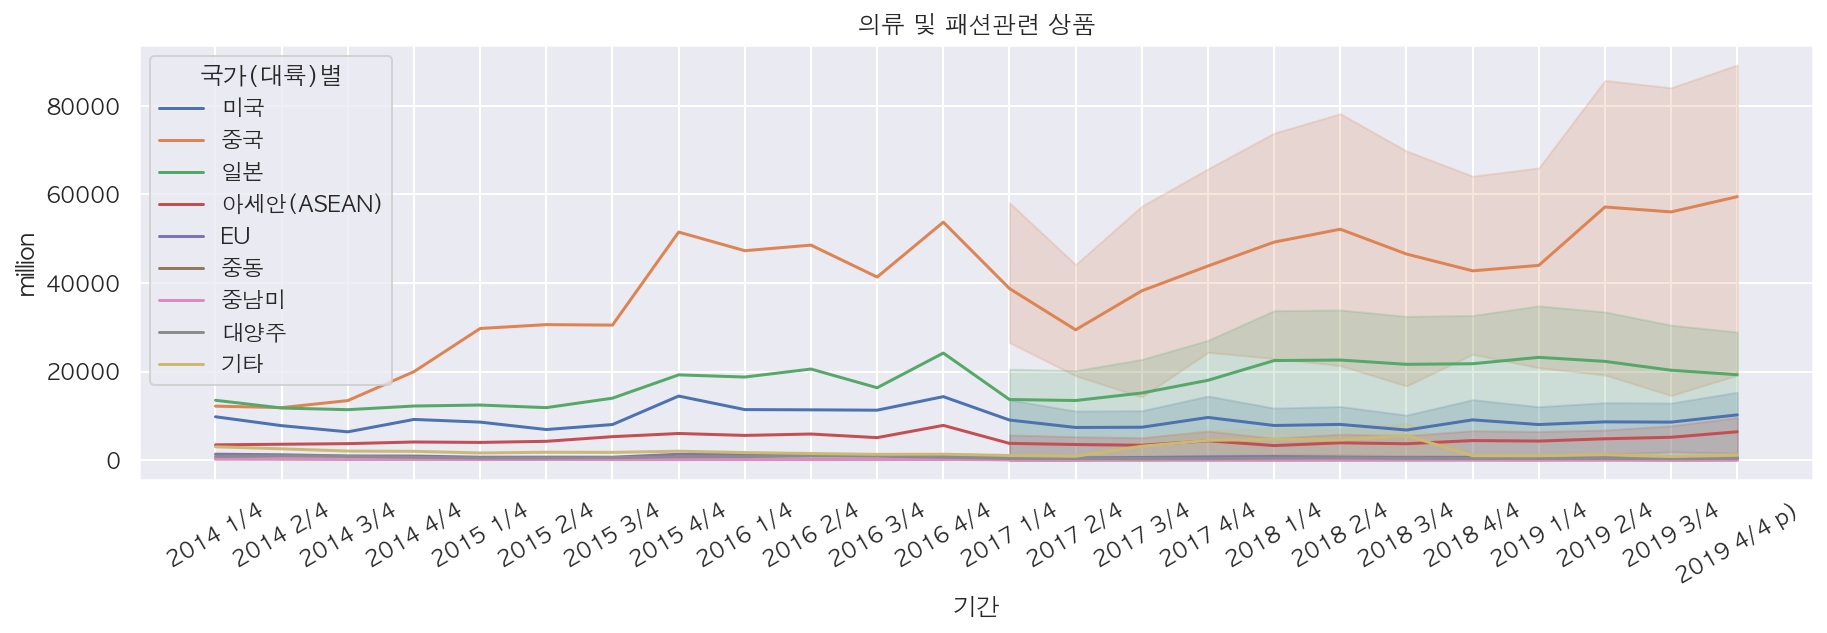

In [64]:
#의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터 시각화, 국가별 다른 색

plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

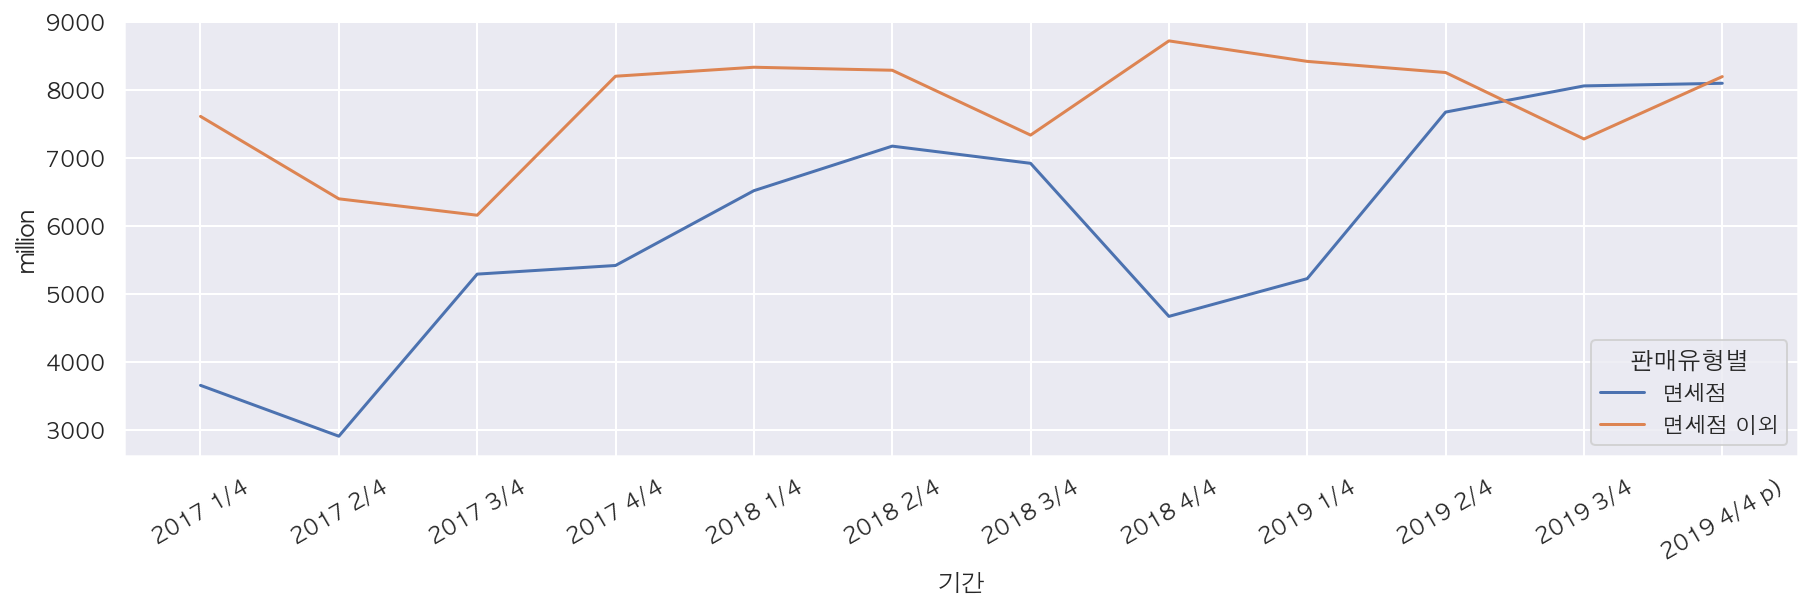

In [68]:
#위와 동일하지만 판매유형별로 살펴보기
df_fashion2 = df[(df['상품군별']=='의류 및 패션관련 상품')&(df['판매유형별'] !='계')].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="million", hue="판매유형별", ci=None)

### 데이터 집계하기

In [69]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
67,미국,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션관련 상품,면세점 이외,2014 1/4,NaN,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
112,중국,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10732,대양주,의류 및 패션관련 상품,면세점,2019 4/4 p),5.0,2019,4
10733,대양주,의류 및 패션관련 상품,면세점 이외,2019 4/4 p),614.0,2019,4
10776,기타,의류 및 패션관련 상품,계,2019 4/4 p),1675.0,2019,4
10777,기타,의류 및 패션관련 상품,면세점,2019 4/4 p),269.0,2019,4


In [71]:
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="million", 
    columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,7472.0,8204.0,7390.0
기타,9683.0,7248.0,5918.0,28774.0,47786.0,12550.0
대양주,3392.0,2349.0,3401.0,4532.0,5442.0,4762.0
미국,33223.0,38066.0,48451.0,100706.0,95548.0,106648.0
아세안(ASEAN),14936.0,19639.0,24478.0,45342.0,46172.0,62310.0
일본,48960.0,57594.0,79905.0,181168.0,265616.0,255444.0
중국,57531.0,142339.0,190932.0,450814.0,571996.0,650036.0
중남미,975.0,616.0,649.0,1524.0,1152.0,1086.0
중동,1172.0,1018.0,968.0,1544.0,1758.0,1848.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

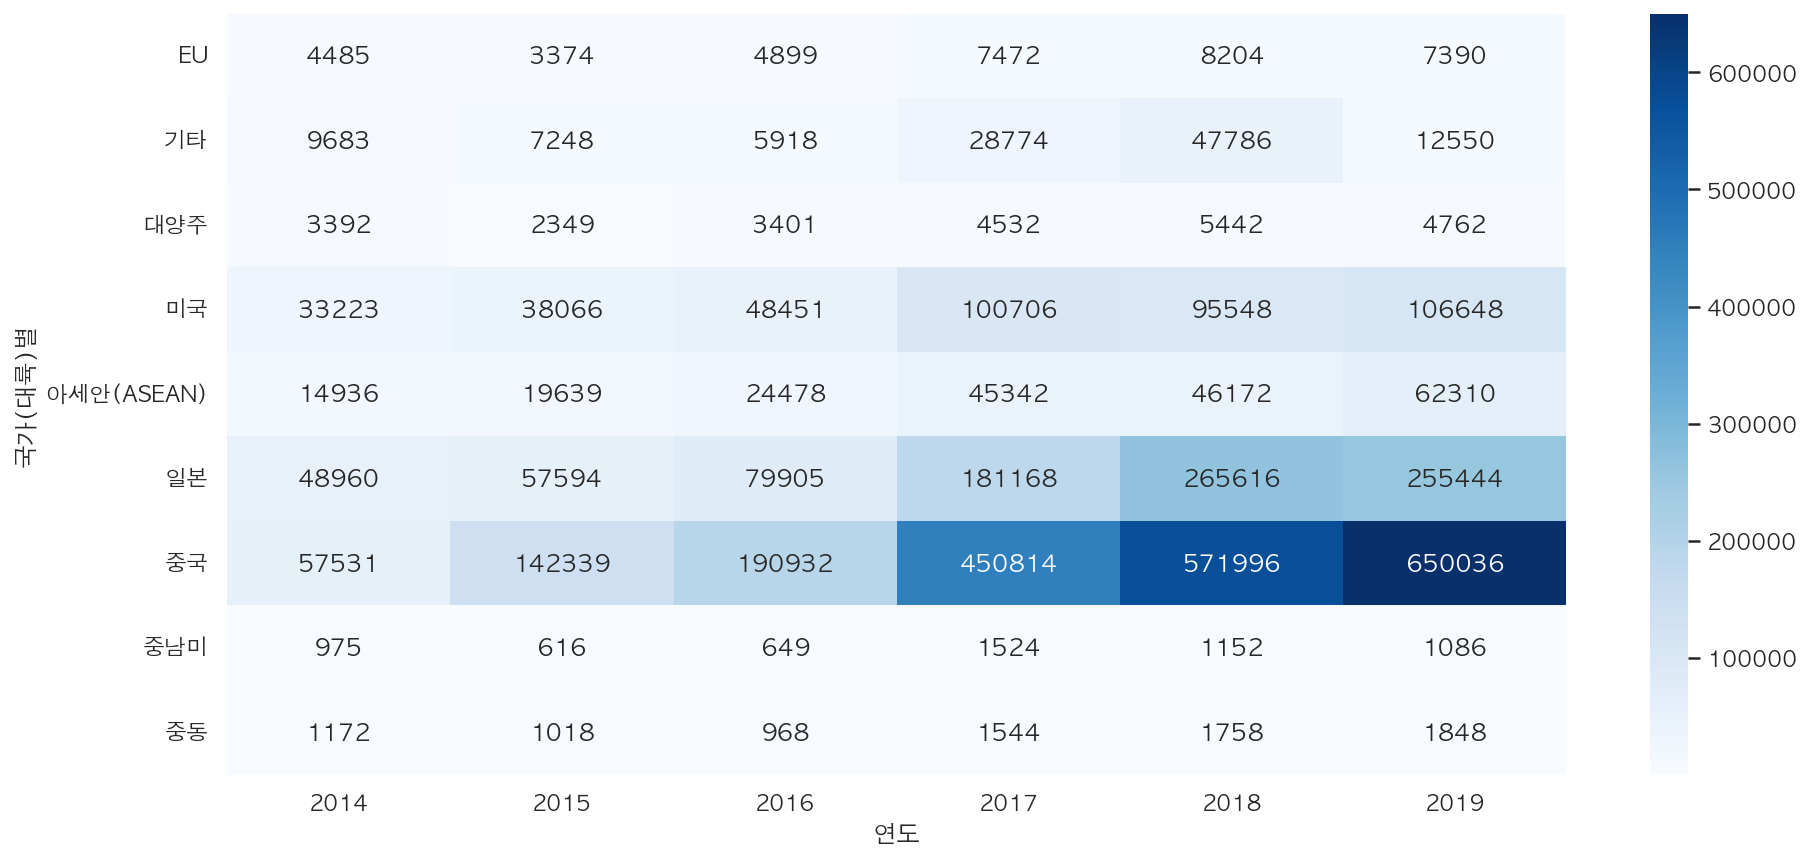

In [72]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

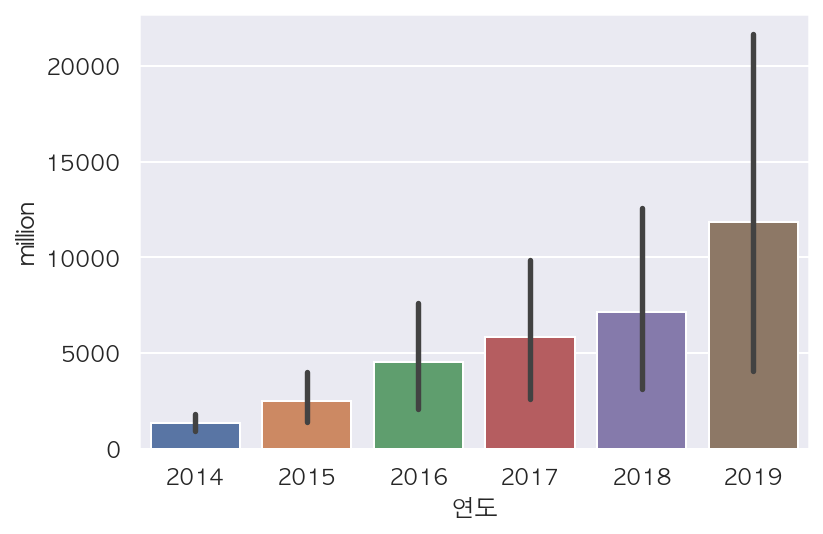

In [74]:
sns.barplot(x="연도", y="million", data=df_total)

<AxesSubplot:xlabel='연도', ylabel='million'>

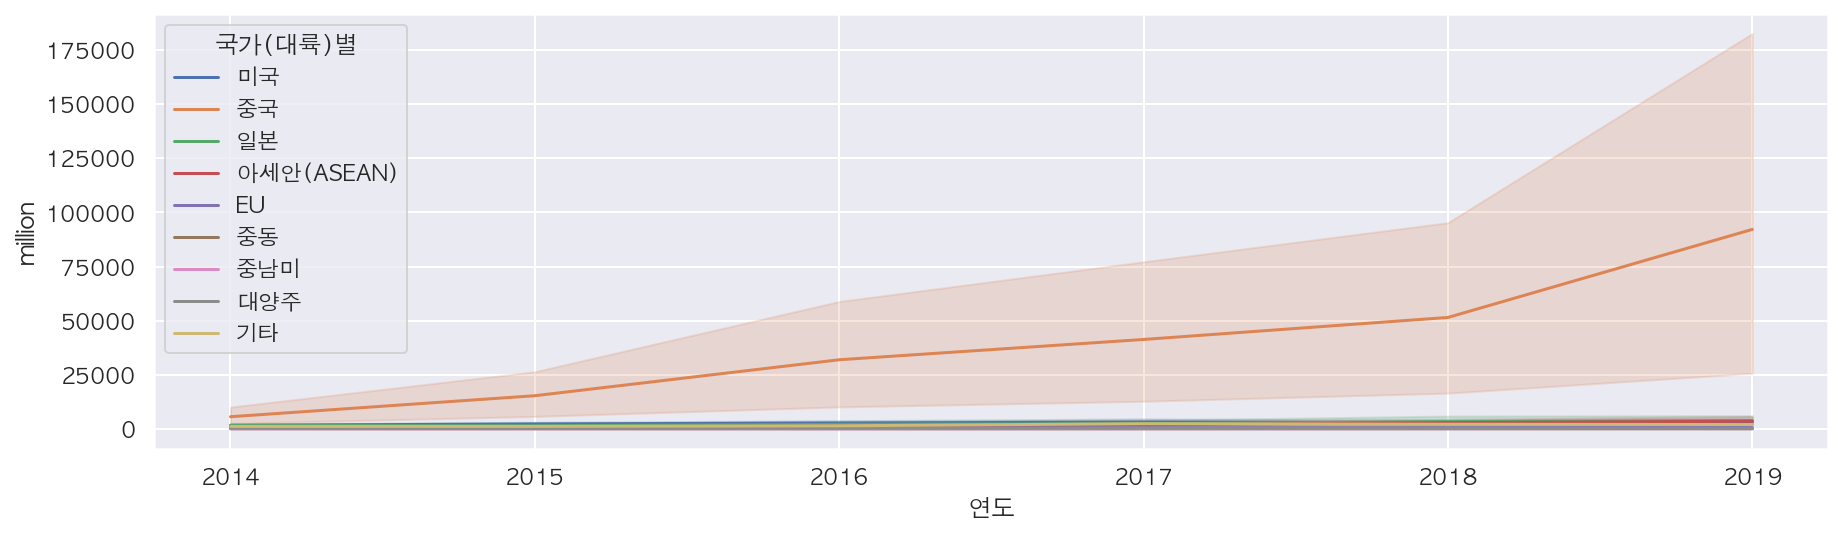

In [75]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_total, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

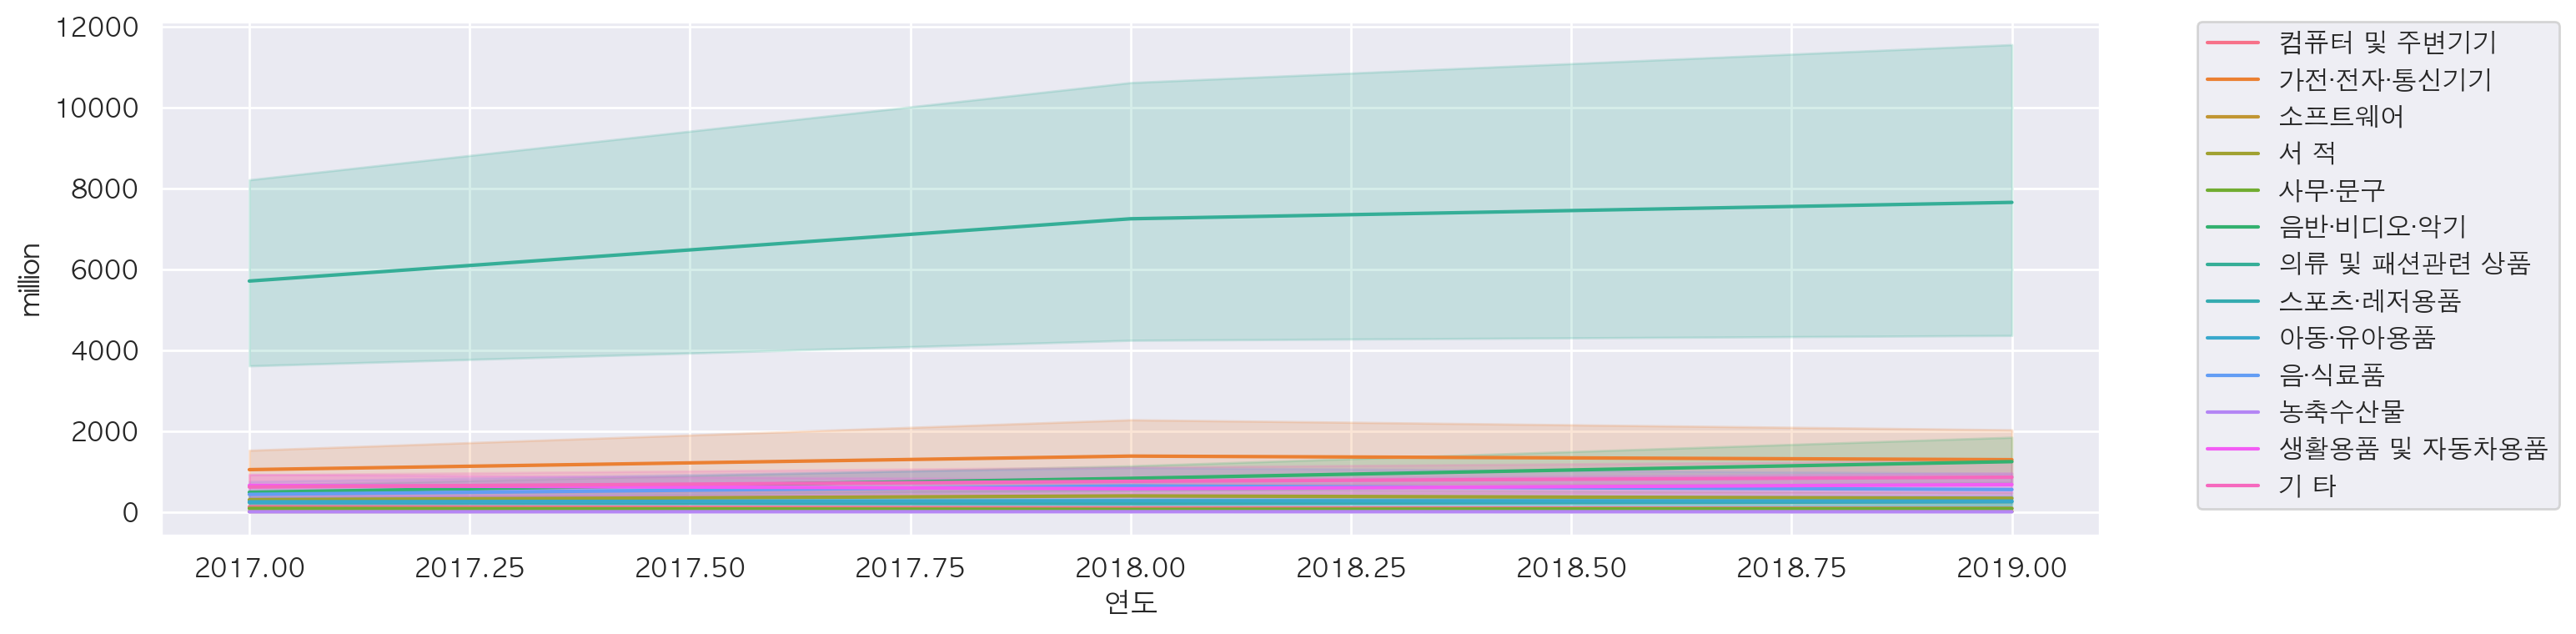

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df['쿼터'] = df['기간'].map(lambda period : period.split()[1])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기,쿼터
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1,1/4
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1,1/4
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1,1/4
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1,1/4
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1,1/4
...,...,...,...,...,...,...,...,...
10793,기타,농축수산물,면세점 이외,2019 4/4 p),2.0,2019,4,4/4
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,2019,4,4/4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,2019,4,4/4
10798,기타,기 타,면세점,2019 4/4 p),1.0,2019,4,4/4
